In this notebook, we will train three models and compare their performance viz Logistic Regression, SVM and Neural Network.

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from datetime import datetime

# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc
)

import warnings
warnings.filterwarnings('ignore')

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Plotting settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*60)
print("LOADING PREPROCESSED DATA")
print("="*60)

# Load preprocessed data
X_train = np.load('/content/drive/MyDrive/ML_Project_2/data/X_train_balanced.npy')
y_train = np.load('/content/drive/MyDrive/ML_Project_2/data/y_train_balanced.npy')
X_test = np.load('/content/drive/MyDrive/ML_Project_2/data/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ML_Project_2/data/y_test.npy')

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining class distribution: {np.bincount(y_train.astype(int))}")
print(f"Test class distribution: {np.bincount(y_test.astype(int))}")
print("\n✓ Data loaded successfully!")

Mounted at /content/drive
LOADING PREPROCESSED DATA

Training set: (29320, 22)
Test set: (5709, 22)

Training class distribution: [14660 14660]
Test class distribution: [3665 2044]

✓ Data loaded successfully!


1. Logistic Regression

In [6]:
# Logistic Regression with GridSearchCV

# Define parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

# Initialize model
lr_model = LogisticRegression(random_state=RANDOM_SEED)

# GridSearchCV
print("\nPerforming GridSearchCV...")
start_time = time.time()

lr_grid = GridSearchCV(
    lr_model,
    lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\n✓ Training completed in {training_time:.2f} seconds")
print(f"\nBest Parameters: {lr_grid.best_params_}")
print(f"Best Cross-Validation F1 Score: {lr_grid.best_score_:.4f}")

# Get best model
lr_best = lr_grid.best_estimator_

# Predictions
y_pred_lr = lr_best.predict(X_test)
y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]

# Save model
with open('/content/drive/MyDrive/ML_Project_2/models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_best, f)
print("\n✓ Model saved!")


Performing GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✓ Training completed in 30.34 seconds

Best Parameters: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation F1 Score: 0.7687

✓ Model saved!


2. SVM

In [4]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

# Define parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Initialize model
svm_model = SVC(random_state=RANDOM_SEED, probability=True) # probability=True for predict_proba

# GridSearchCV
print("\nPerforming GridSearchCV...")

start_time = time.time()

svm_grid = GridSearchCV(
    svm_model,
    svm_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\n✓ Training completed in {training_time:.2f} seconds")
print(f"\nBest Parameters: {svm_grid.best_params_}")
print(f"Best Cross-Validation F1 Score: {svm_grid.best_score_:.4f}")

# Get best model
svm_best = svm_grid.best_estimator_

# Predictions
y_pred_svm = svm_best.predict(X_test)
y_pred_proba_svm = svm_best.predict_proba(X_test)[:, 1]

# Save model
with open('/content/drive/MyDrive/ML_Project_2/models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_best, f)
print("\n✓ Model saved!")


Performing GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✓ Training completed in 8398.56 seconds

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation F1 Score: 0.7965

✓ Model saved!


Neural Net

In [7]:
# Neural Network with GridSearchCV

nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000],
    'early_stopping': [True]  # Stops when validation score stops improving
}

# Initialize model
nn_model = MLPClassifier(random_state=RANDOM_SEED)

# GridSearchCV
print("\nPerforming GridSearchCV...")
start_time = time.time()

nn_grid = GridSearchCV(
    nn_model,
    nn_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

nn_grid.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\n✓ Training completed in {training_time:.2f} seconds")
print(f"\nBest Parameters: {nn_grid.best_params_}")
print(f"Best Cross-Validation F1 Score: {nn_grid.best_score_:.4f}")

# Get best model
nn_best = nn_grid.best_estimator_

# Predictions
y_pred_nn = nn_best.predict(X_test)
y_pred_proba_nn = nn_best.predict_proba(X_test)[:, 1]

# Save model
with open('/content/drive/MyDrive/ML_Project_2/models/neural_network_model.pkl', 'wb') as f:
    pickle.dump(nn_best, f)
print("\n✓ Model saved!")


Performing GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

✓ Training completed in 1421.20 seconds

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 2000}
Best Cross-Validation F1 Score: 0.7852

✓ Model saved!


Comparing the performance of the models

In [8]:
# Calculate metrics for all models
print("\n" + "="*60)
print("MODEL EVALUATION - PERFORMANCE METRICS")
print("="*60)

def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    """Calculate all evaluation metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
    return metrics

# Calculate metrics for each model
lr_metrics = calculate_metrics(y_test, y_pred_lr, y_pred_proba_lr, 'Logistic Regression')
svm_metrics = calculate_metrics(y_test, y_pred_svm, y_pred_proba_svm, 'SVM')
nn_metrics = calculate_metrics(y_test, y_pred_nn, y_pred_proba_nn, 'Neural Network')

# Create comparison dataframe
results_df = pd.DataFrame([lr_metrics, svm_metrics, nn_metrics])
results_df = results_df.round(4)

print("\n" + results_df.to_string(index=False))

# Save results

results_df.to_csv('/content/drive/MyDrive/ML_Project_2/reports/model_comparison.csv', index=False)
print("\n✓ Results saved to CSV")

# Identify best model
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {results_df.loc[best_model_idx, 'F1-Score']:.4f}")


MODEL EVALUATION - PERFORMANCE METRICS

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.7103     0.5628  0.8547    0.6787   0.7943
                SVM    0.7239     0.5919  0.7373    0.6566   0.7959
     Neural Network    0.7360     0.5972  0.8072    0.6865   0.8230

✓ Results saved to CSV

🏆 BEST MODEL: Neural Network
   F1-Score: 0.6865



Generating performance visualizations...


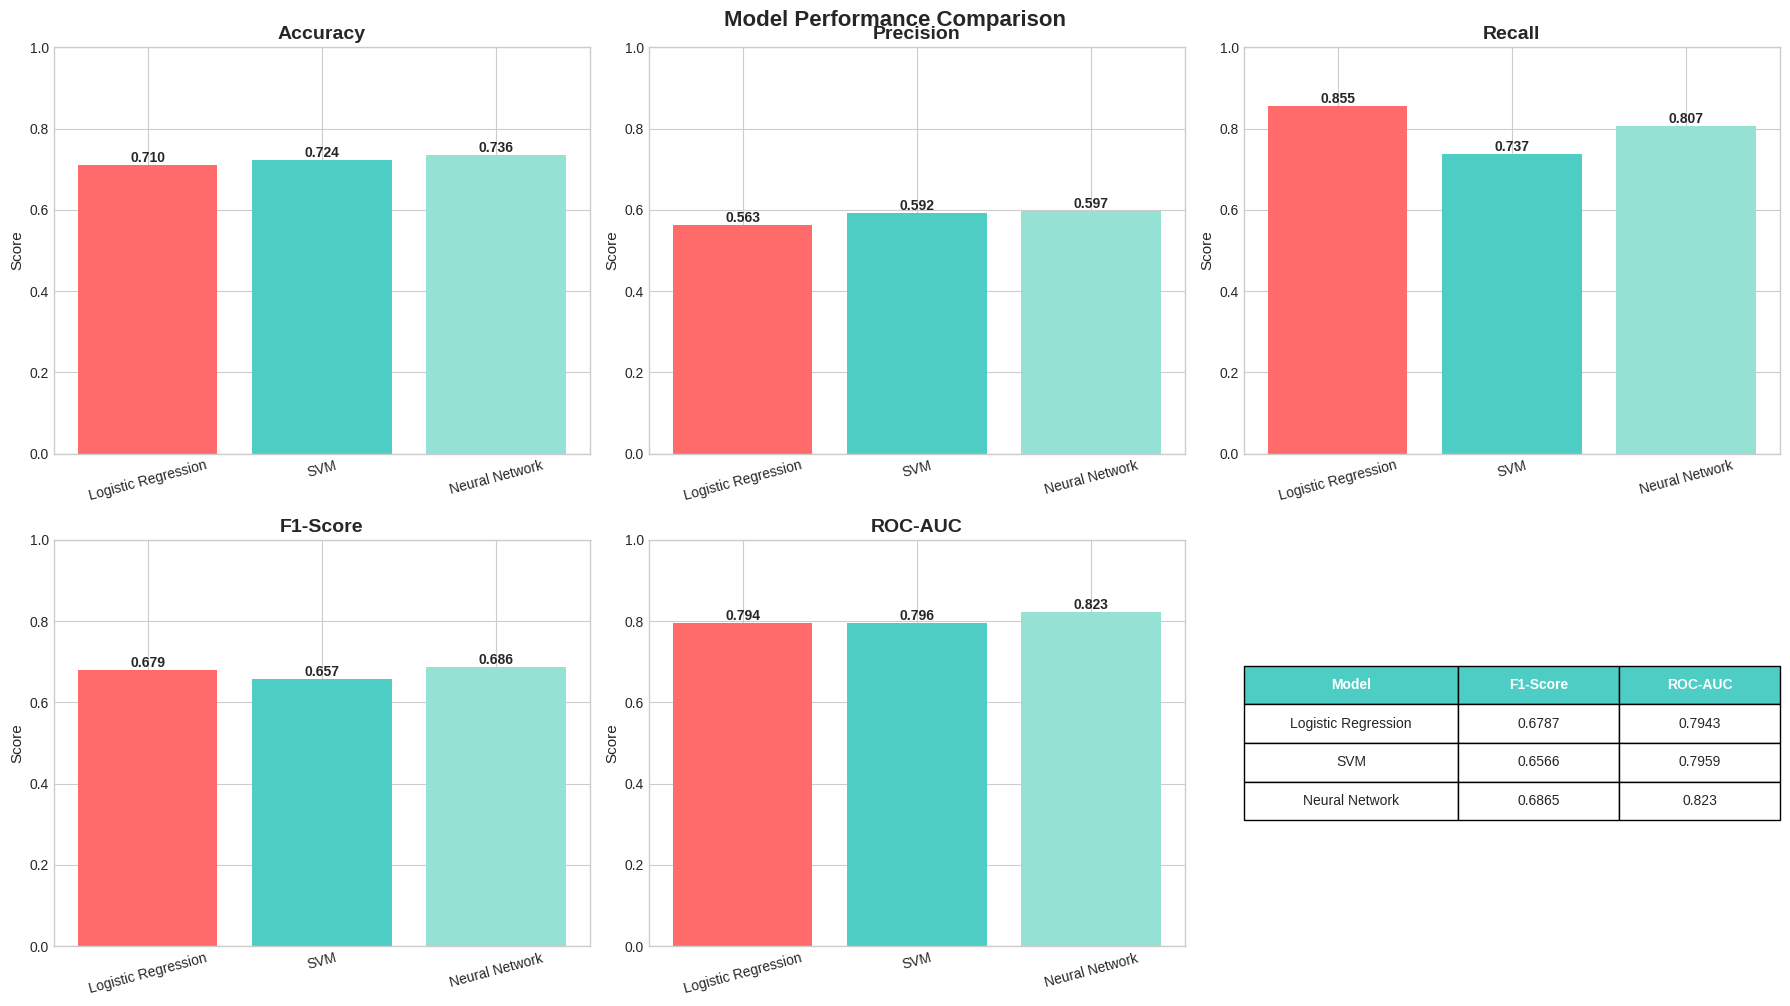

✓ Performance visualization saved!


In [9]:
# Visualize model comparison
print("\nGenerating performance visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

# Plot each metric
for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3

    values = results_df[metric].values
    models = results_df['Model'].values

    bars = axes[row, col].bar(models, values, color=colors)
    axes[row, col].set_title(metric, fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Score', fontsize=11)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].tick_params(axis='x', rotation=15)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}',
                           ha='center', va='bottom', fontweight='bold')

# Overall comparison
axes[1, 2].axis('off')
table_data = results_df[['Model', 'F1-Score', 'ROC-AUC']].values
table = axes[1, 2].table(cellText=table_data,
                         colLabels=['Model', 'F1-Score', 'ROC-AUC'],
                         cellLoc='center', loc='center',
                         colWidths=[0.4, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header
for i in range(3):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.001)
plt.savefig('/content/drive/MyDrive/ML_Project_2/reports/model_comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Performance visualization saved!")

CONFUSION MATRICES


Generating confusion matrices...


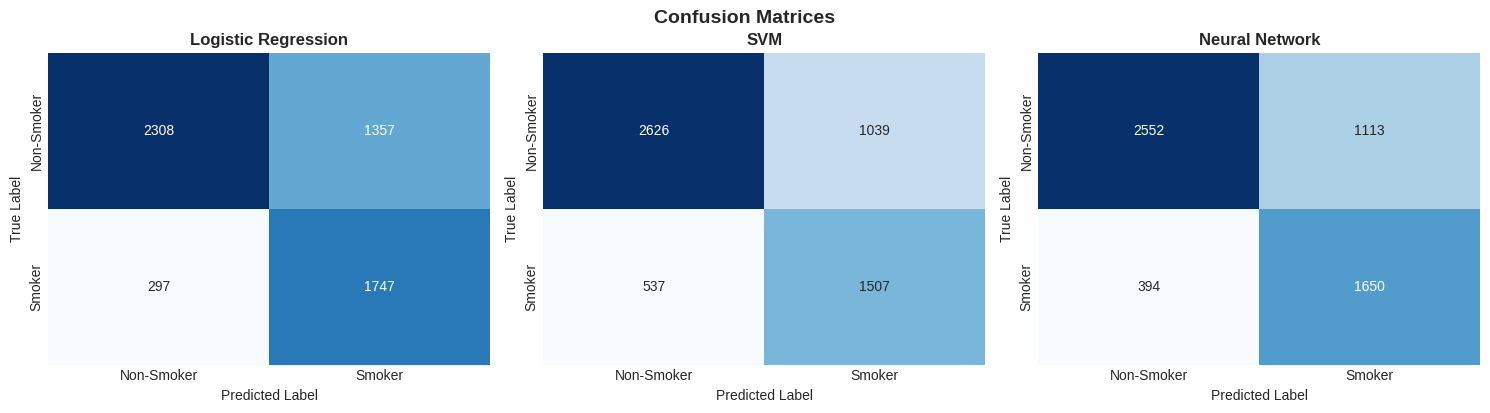

✓ Confusion matrices saved!


In [10]:
# Plot confusion matrices
print("\nGenerating confusion matrices...")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

predictions = [
    (y_pred_lr, 'Logistic Regression'),
    (y_pred_svm, 'SVM'),
    (y_pred_nn, 'Neural Network')
]

for idx, (y_pred, model_name) in enumerate(predictions):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], cbar=False,
                xticklabels=['Non-Smoker', 'Smoker'],
                yticklabels=['Non-Smoker', 'Smoker'])

    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold', y=1.02)
plt.savefig('/content/drive/MyDrive/ML_Project_2/reports/confusion_matrices.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices saved!")

In [11]:
#ROC Curves


Generating ROC curves...


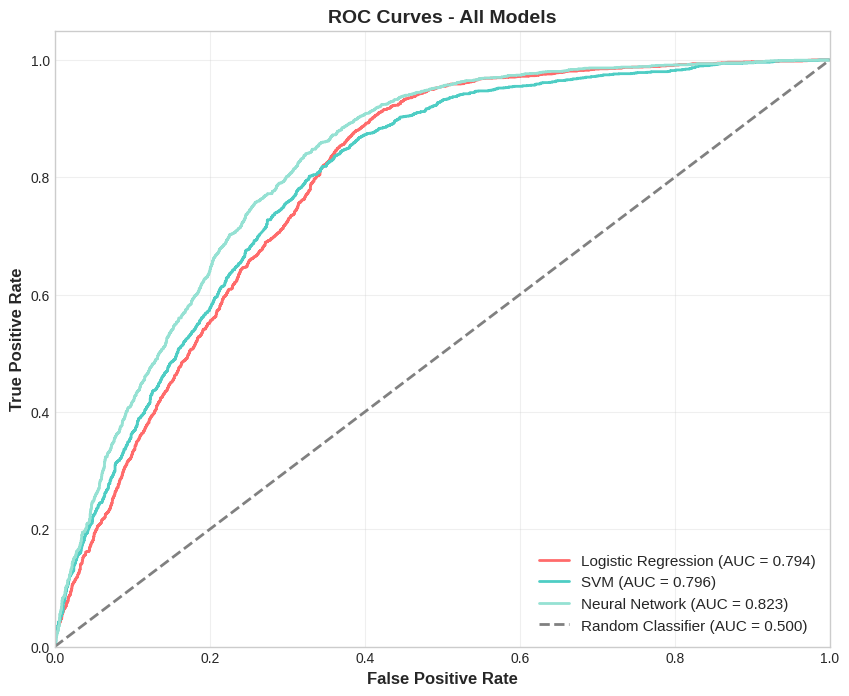

✓ ROC curves saved!


In [12]:
# Plot ROC curves
print("\nGenerating ROC curves...")

plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='#FF6B6B', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# SVM ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='#4ECDC4', lw=2,
         label=f'SVM (AUC = {roc_auc_svm:.3f})')

# Neural Network ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, color='#95E1D3', lw=2,
         label=f'Neural Network (AUC = {roc_auc_nn:.3f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',
         label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.savefig('/content/drive/MyDrive/ML_Project_2/reports/roc_curves.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves saved!")

In [13]:
# Print detailed classification reports
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

models_info = [
    (y_pred_lr, 'LOGISTIC REGRESSION'),
    (y_pred_svm, 'SUPPORT VECTOR MACHINE'),
    (y_pred_nn, 'NEURAL NETWORK')
]

for y_pred, model_name in models_info:
    print(f"\n{model_name}")
    print("-" * 60)
    print(classification_report(y_test, y_pred,
                                target_names=['Non-Smoker', 'Smoker'],
                                digits=4))

# Save detailed reports
with open('/content/drive/MyDrive/ML_Project_2/reports/classification_reports.txt', 'w') as f:
    for y_pred, model_name in models_info:
        f.write(f"{model_name}\n")
        f.write("=" * 60 + "\n")
        f.write(classification_report(y_test, y_pred,
                                     target_names=['Non-Smoker', 'Smoker'],
                                     digits=4))
        f.write("\n\n")

print("\n✓ Detailed reports saved!")


DETAILED CLASSIFICATION REPORTS

LOGISTIC REGRESSION
------------------------------------------------------------
              precision    recall  f1-score   support

  Non-Smoker     0.8860    0.6297    0.7362      3665
      Smoker     0.5628    0.8547    0.6787      2044

    accuracy                         0.7103      5709
   macro avg     0.7244    0.7422    0.7075      5709
weighted avg     0.7703    0.7103    0.7156      5709


SUPPORT VECTOR MACHINE
------------------------------------------------------------
              precision    recall  f1-score   support

  Non-Smoker     0.8302    0.7165    0.7692      3665
      Smoker     0.5919    0.7373    0.6566      2044

    accuracy                         0.7239      5709
   macro avg     0.7111    0.7269    0.7129      5709
weighted avg     0.7449    0.7239    0.7289      5709


NEURAL NETWORK
------------------------------------------------------------
              precision    recall  f1-score   support

  Non-Smoker  

In [14]:
# Generate final summary
print("\n" + "="*60)
print("TRAINING SUMMARY & INSIGHTS")
print("="*60)

print("\n📊 MODEL PERFORMANCE RANKINGS:")
print("-" * 60)

# Rank by F1-Score
ranked = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)
for idx, row in ranked.iterrows():
    print(f"{idx+1}. {row['Model']}")
    print(f"   F1-Score: {row['F1-Score']:.4f} | ROC-AUC: {row['ROC-AUC']:.4f}")
    print(f"   Accuracy: {row['Accuracy']:.4f} | Precision: {row['Precision']:.4f} | Recall: {row['Recall']:.4f}")
    print()

print("\n🎯 BEST MODEL PARAMETERS:")
print("-" * 60)
if best_model_name == 'Logistic Regression':
    print(f"Model: {best_model_name}")
    print(f"Parameters: {lr_grid.best_params_}")
elif best_model_name == 'SVM':
    print(f"Model: {best_model_name}")
    print(f"Parameters: {svm_grid.best_params_}")
else:
    print(f"Model: {best_model_name}")
    print(f"Parameters: {nn_grid.best_params_}")

print("\n💾 SAVED FILES:")
print("-" * 60)
print("Models:")
print("  • logistic_regression_model.pkl")
print("  • svm_model.pkl")
print("  • neural_network_model.pkl")
print("\nReports:")
print("  • model_comparison.csv")
print("  • model_comparison.png")
print("  • confusion_matrices.png")
print("  • roc_curves.png")
print("  • classification_reports.txt")

print("\n✅ MODEL TRAINING COMPLETE!")
print("="*60)

# Key insights for report
print("\n💡 KEY INSIGHTS FOR YOUR REPORT:")
print("-" * 60)
print("1. Compare which model performed best and why")
print("2. Discuss the trade-off between precision and recall")
print("3. Analyze confusion matrices - which class is harder to predict?")
print("4. Explain how SMOTE affected model performance")
print("5. Discuss computational cost vs performance trade-offs")
print("6. Recommend the best model for deployment based on F1-score")
print("\nReady to write your final report! 📝")


TRAINING SUMMARY & INSIGHTS

📊 MODEL PERFORMANCE RANKINGS:
------------------------------------------------------------
1. Neural Network
   F1-Score: 0.6865 | ROC-AUC: 0.8230
   Accuracy: 0.7360 | Precision: 0.5972 | Recall: 0.8072

2. Logistic Regression
   F1-Score: 0.6787 | ROC-AUC: 0.7943
   Accuracy: 0.7103 | Precision: 0.5628 | Recall: 0.8547

3. SVM
   F1-Score: 0.6566 | ROC-AUC: 0.7959
   Accuracy: 0.7239 | Precision: 0.5919 | Recall: 0.7373


🎯 BEST MODEL PARAMETERS:
------------------------------------------------------------
Model: Neural Network
Parameters: {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 2000}

💾 SAVED FILES:
------------------------------------------------------------
Models:
  • logistic_regression_model.pkl
  • svm_model.pkl
  • neural_network_model.pkl

Reports:
  • model_comparison.csv
  • model_comparison.png
  • confusion_matrices.png
  • roc_curves.png
  • cla